In [1]:
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("/Users/jlazar/research/prometheus/paper_plots/paper.mplstyle")

from glob import glob
import matplotlib

In [8]:
def remove_trailing_comments(line):
    if not "#" in line:
        return line
    argwhere = line.find("#")
    return line[:argwhere]

In [9]:
def which_layer(r, outer_radii):
    for idx, radius in enumerate(outer_radii):
        if radius - r >= 0:
            return idx
    raise ValueError(f"r is too big. Max radius is {radius}")

In [10]:
from matplotlib.patches import Patch
ice_handles = [
    Patch(facecolor='white', edgecolor='k', label='Air', alpha=0.6),
    Patch(facecolor='deepskyblue', edgecolor='k', label='Ice', alpha=0.6),
    Patch(facecolor='sienna', edgecolor='k', label='Rock', alpha=0.6),
    Patch(facecolor='slategrey', edgecolor='k', label='Iron', alpha=0.6),
]
ice_colors = [
    "white",
    "deepskyblue",
    "deepskyblue",
    "sienna",
    "sienna",
    "sienna",
    "sienna",
    "sienna",
    "sienna",
    "sienna",
    "slategrey",
    "slategrey"  
]
water_handles = [
    Patch(facecolor='white', edgecolor='k', label='Air', alpha=0.6),
    Patch(facecolor='dodgerblue', edgecolor='k', label='Water', alpha=0.6),
    Patch(facecolor='sienna', edgecolor='k', label='Rock', alpha=0.6),
    Patch(facecolor='slategrey', edgecolor='k', label='Iron', alpha=0.6),
]
water_colors = [
    "white",
    "dodgerblue",
    "sienna",
    "sienna",
    "sienna",
    "sienna",
    "sienna",
    "sienna",
    "sienna",
    "slategrey",
    "slategrey"  
]

In [30]:
fs = glob("densities/*.dat")

In [31]:
fs

['densities/PREM_water.dat',
 'densities/PREM_gvd.dat',
 'densities/PREM_orca.dat',
 'densities/PREM_south_pole.dat',
 'densities/PREM_arca.dat',
 'densities/PREM_trident.dat',
 'densities/PREM_pone.dat']

/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_14587/1615414308.py:34: RuntimeWarning: divide by zero encountered in log10
  max(np.log10(outer_radii[-1] - outr), 4.9),


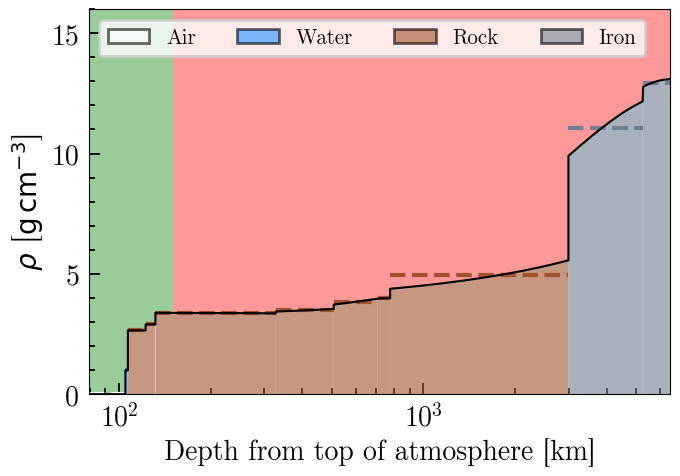

/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_14587/1615414308.py:34: RuntimeWarning: divide by zero encountered in log10
  max(np.log10(outer_radii[-1] - outr), 4.9),


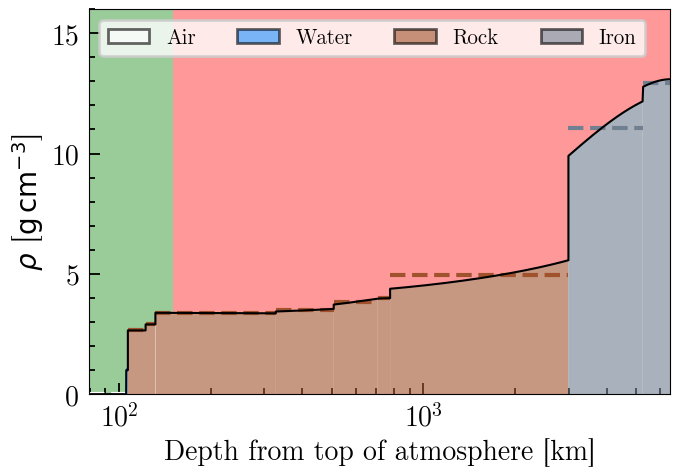

/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_14587/1615414308.py:34: RuntimeWarning: divide by zero encountered in log10
  max(np.log10(outer_radii[-1] - outr), 4.9),


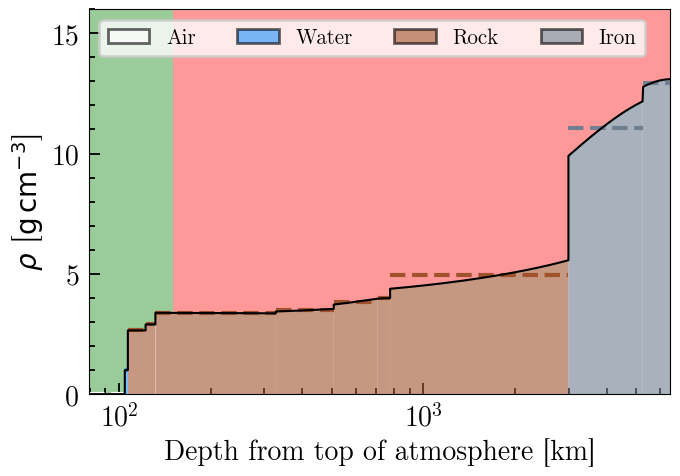

/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_14587/1615414308.py:34: RuntimeWarning: divide by zero encountered in log10
  max(np.log10(outer_radii[-1] - outr), 4.9),


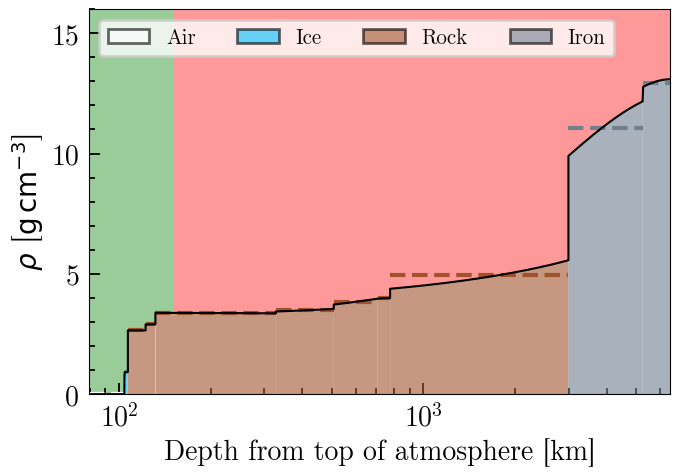

/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_14587/1615414308.py:34: RuntimeWarning: divide by zero encountered in log10
  max(np.log10(outer_radii[-1] - outr), 4.9),


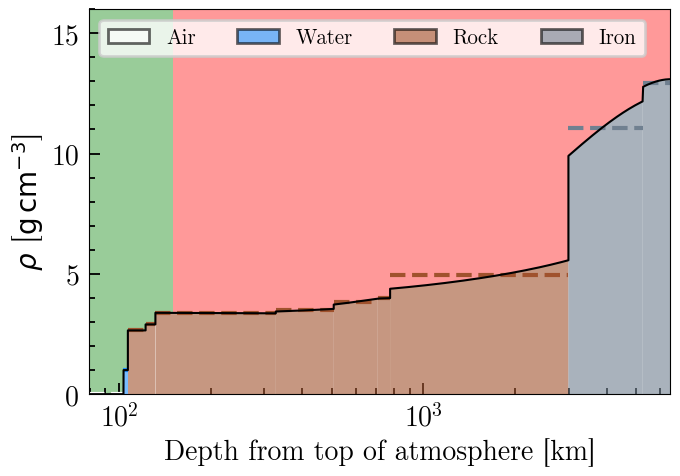

/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_14587/1615414308.py:34: RuntimeWarning: divide by zero encountered in log10
  max(np.log10(outer_radii[-1] - outr), 4.9),


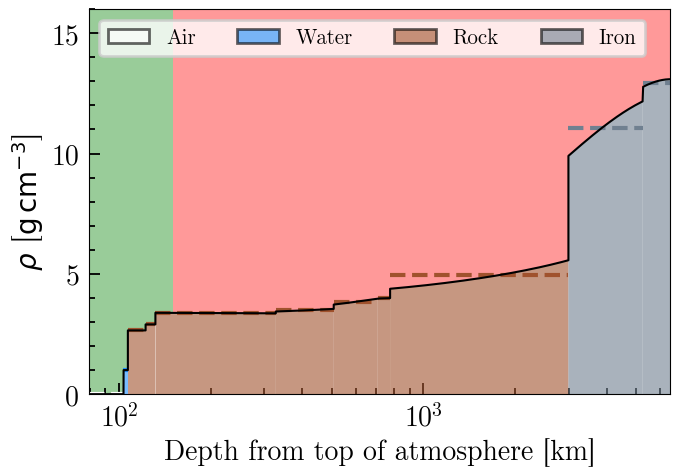

/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_14587/1615414308.py:34: RuntimeWarning: divide by zero encountered in log10
  max(np.log10(outer_radii[-1] - outr), 4.9),


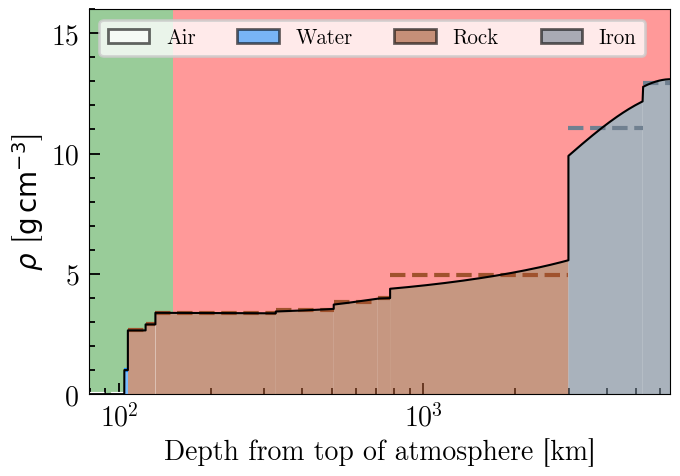

In [33]:
for file in fs:
    handles = water_handles
    colors = water_colors
    if "south_pol" in file:
        handles = ice_handles
        colors = ice_colors
    inner_radius = 0
    ps = []
    outer_radii = []
    with open(file, "r") as f:
        for line in f:
            line = line.replace("\n", "")
            line = remove_trailing_comments(line)
            if not line:
                continue
            splitline = [x for x in line.split(" ") if x]

            outer_radius = float(splitline[0])
            p = np.polynomial.Polynomial(
                [float(x) for x in splitline[4:]],
                # domain=[inner_radius, outer_radius]
            )
            ps.append(p)
            outer_radii.append(outer_radius)
            
    outer_radii = np.array(outer_radii)
    inner_radii = np.append([0], outer_radii[:-1])
    
    all_rhos = []
    all_depths = []

    for inr, outr, c in zip(inner_radii[::-1], outer_radii[::-1], colors):
        depths = np.logspace(
            max(np.log10(outer_radii[-1] - outr), 4.9),
            np.log10((outer_radii[-1] - inr)*0.99999),
            50
        )
        radii = outer_radii[-1] - depths
        rhos = []
        for radius in radii:
            rhos.append(ps[which_layer(radius, outer_radii)](radius))
        rho_bar = (rhos[2] + rhos[-2]) / 2
        all_depths = np.append(all_depths, depths)
        all_rhos = np.append(all_rhos, rhos)

        

        plt.fill_between(depths / 1000, np.zeros(len(rhos)), rhos, facecolor=c, alpha=0.6, zorder=2)
        plt.plot(depths / 1000, np.full(len(depths), rho_bar), color=c, ls="--", lw=3)
        
    plt.fill_between([1e1, 150], [0,0], [20, 20], zorder=0, facecolor="green", edgecolor="none", alpha=0.4)
    plt.fill_between([150, 1e4], [0,0], [20, 20], zorder=0, facecolor="red", edgecolor="none", alpha=0.4)
    plt.fill_between(all_depths / 1000, np.zeros(len(all_depths)), all_rhos, zorder=1, facecolor="white", edgecolor="none")
    plt.plot(all_depths / 1000, all_rhos, lw=1.5, color="k", zorder=3)
    plt.semilogx()

    plt.legend(handles=handles, fontsize=15, ncol=4, loc=2)
    plt.xlim(10**1.9, outer_radii[-1] / 1000)
    plt.ylim(0, 16)

    plt.xlabel("Depth from top of atmosphere [km]")
    plt.ylabel(r"$\rho~\left[{\rm{g}}\,{\rm{cm}}^{-3}\right]$")
    
    fname = file.split("/")[-1].split(".")[0]
    plt.savefig(f"../../paper_plots/earth_model_plots/{fname}.pdf")

    plt.show()

In [ ]:
all_rhos = []
all_depths = []

for inr, outr, c in zip(inner_radii[::-1], outer_radii[::-1], colors):
    depths = np.logspace(
        max(np.log10(outer_radii[-1] - outr), 4.9),
        np.log10((outer_radii[-1] - inr)*0.99999),
        500
    )
    radii = outer_radii[-1] - depths
    rhos = []
    for radius in radii:
        rhos.append(ps[which_layer(radius, outer_radii)](radius))
    all_depths = np.append(all_depths, depths)
    all_rhos = np.append(all_rhos, rhos)
    
    rho_bar = (rhos[0] + rhos[-1]) / 2
    
    plt.fill_between(depths / 1000, np.zeros(len(rhos)), rhos, facecolor=c, alpha=0.6, zorder=0)
    plt.plot(depths / 1000, np.full(len(depths), rho_bar), color=c, ls="--", lw=3)
plt.plot(all_depths / 1000, all_rhos, lw=1.5, color="k", zorder=1)
plt.semilogx()

plt.legend(handles=ice_handles, fontsize=15, ncol=4)
plt.xlim(10**1.9, outer_radii[-1] / 1000)
plt.ylim(0, None)

plt.xlabel("Depth from top of atmosphere [km]")
plt.ylabel(r"$\rho~\left[{\rm{g}}\,{\rm{cm}}^{-3}\right]$")

plt.show()